In [3]:
import folium
import pandas as pd

In [2]:
berlin_bezirken = './berlin_bezirke.geojson'

In [11]:
map = folium.Map(location=[52.516503, 13.400972], zoom_start=10)

In [12]:
map

In [13]:
states = pd.read_json(berlin_bezirken)

In [21]:
states.iloc[0]['features']['properties']['name']

'Mitte'

In [4]:
mitte_vornamen = pd.read_csv('/home/walrus/mitte.csv', sep=';')

In [6]:
mitte_vornamen.head()

,vorname,anzahl,geschlecht
0,Sophie,69,w
1,Marie,61,w
2,Maria,52,w
3,Anna,48,w
4,Charlotte,47,w


In [ ]:
mv = mitte_vornamen[mitte_vornamen['geschlecht'] == 'm'].iloc[0:10][['vorname', 'anzahl']]

In [75]:
mv[0:10]

,vorname,anzahl,geschlecht
5,Paul,46,m
6,Alexander,45,m
7,Maximilian,40,m
8,Elias,36,m
9,Ali,33,m
11,Anton,31,m
12,Felix,28,m
13,Henry,28,m
14,Noah,28,m
15,Theodor,28,m


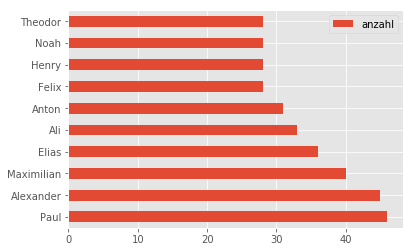

In [82]:
mv10 = mv[:10][['vorname','anzahl']]
ax = mv10.plot.barh()
ax.set_yticklabels(mv10['vorname'])


In [41]:
matplotlib.style.use('ggplot')


In [55]:
!head /home/walrus/mitte.csv

vorname;anzahl;geschlecht
Sophie;69;w
Marie;61;w
Maria;52;w
Anna;48;w
Charlotte;47;w
Paul;46;m
Alexander;45;m
Maximilian;40;m
Elias;36;m


In [59]:
mitte_vornamen[mitte_vornamen['geschlecht'] == 'm']

,vorname,anzahl,geschlecht
5,Paul,46,m
6,Alexander,45,m
7,Maximilian,40,m
8,Elias,36,m
9,Ali,33,m
11,Anton,31,m
12,Felix,28,m
13,Henry,28,m
14,Noah,28,m
15,Theodor,28,m


In [65]:
mv = mitte_vornamen[mitte_vornamen['geschlecht'] == 'm']

In [69]:
mv[mv['vorname'] == 'Paul']

,vorname,anzahl,geschlecht
5,Paul,46,m


In [84]:
mv[mv['vorname'] == 'Luis']

,vorname,anzahl,geschlecht
91,Luis,13,m


In [94]:
vornamen_files = !ls ./data

In [95]:
vornamen_files

['charlottenburg-wilmersdorf.csv',
 'friedrichshain-kreuzberg.csv',
 'lichtenberg.csv',
 'marzahn-hellersdorf.csv',
 'mitte.csv',
 'neukoelln.csv',
 'pankow.csv',
 'reinickendorf.csv',
 'spandau.csv',
 'steglitz-zehlendorf.csv',
 'tempelhof-schoeneberg.csv',
 'treptow-koepenick.csv']

In [106]:
names_data = {}
for file in vornamen_files:
    print(file)
    names_data[file.split('.')[0]] = pd.read_csv('./data/{}'.format(file), sep=';')

charlottenburg-wilmersdorf.csv
friedrichshain-kreuzberg.csv
lichtenberg.csv
marzahn-hellersdorf.csv
mitte.csv
neukoelln.csv
pankow.csv
reinickendorf.csv
spandau.csv
steglitz-zehlendorf.csv
tempelhof-schoeneberg.csv
treptow-koepenick.csv


In [109]:
for name in names_data.keys():
    names_data[name]['bezirke'] = name

In [111]:
all_bezirke = pd.concat(names_data.values())

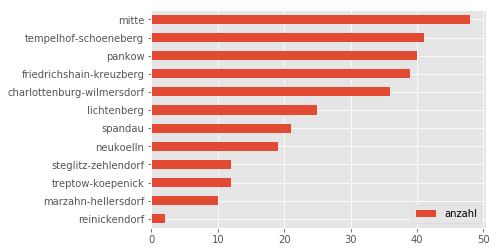

In [136]:
ab = all_bezirke[all_bezirke['vorname'] == 'Anna']
ab = ab.sort_values(by='anzahl')
ax = ab[['anzahl', 'bezirke']].plot.barh()
ax.set_yticklabels(ab['bezirke'])

In [127]:
ab.sort_values(by='anzahl')

,vorname,anzahl,geschlecht,bezirke
276,Edgar,4,m,neukoelln
380,Edgar,5,m,tempelhof-schoeneberg
153,Edgar,7,m,spandau
40,Edgar,8,m,treptow-koepenick
139,Edgar,10,m,friedrichshain-kreuzberg
166,Edgar,11,m,charlottenburg-wilmersdorf
68,Edgar,12,m,lichtenberg
128,Edgar,13,m,pankow


In [134]:
all_bezirke[all_bezirke['vorname'] == 'Luisa']

,vorname,anzahl,geschlecht,bezirke
163,Luisa,9,w,friedrichshain-kreuzberg
47,Luisa,24,w,tempelhof-schoeneberg
54,Luisa,14,w,spandau
87,Luisa,13,w,mitte
47,Luisa,15,w,lichtenberg
56,Luisa,21,w,pankow
1816,Luisa,1,m,pankow
27,Luisa,31,w,charlottenburg-wilmersdorf
173,Luisa,2,w,reinickendorf
89,Luisa,4,w,marzahn-hellersdorf


In [185]:
map = folium.Map(location=[52.516503, 13.400972], zoom_start=3)
map.choropleth(geo_path='./new_states.json', data=ab,
             columns=['bezirke', 'anzahl'],
             key_on='properties.name',
             fill_color='YlGn', fill_opacity=0.7, line_opacity=0.2)

In [157]:
for si, s in states.iterrows():
    states.ix[si]['features']['properties']['name'] = states.ix[si]['features']['properties']['name'].lower()

In [162]:
for si, s in states.iterrows():
    print(si, states.ix[si]['features']['properties']['name'])

0 mitte
1 friedrichshain-kreuzberg
2 pankow
3 charlottenburg-wilmersdorf
4 spandau
5 steglitz-zehlendorf
6 tempelhof-schöneberg
7 neukölln
8 treptow-köpenick
9 marzahn-hellersdorf
10 lichtenberg
11 reinickendorf


In [164]:
states.ix[6]['features']['properties']['name'] = 'tempelhof-schoeneberg'
states.ix[8]['features']['properties']['name'] = 'treptow-koepenick'



In [169]:
new_states = states.to_json()

In [179]:
f = open('new_states.json', 'w')
f.writelines(new_states)
f.flush()

In [186]:
map

AttributeError: 'str' object has no attribute 'setdefault'

In [183]:
import json


In [184]:
jf = open('./new_states.json', 'r').read()
m = json.loads(jf)

{'features': {'0': {'geometry': {'coordinates': [[[[13.403528, 52.540212],
       [13.404195, 52.540402],
       [13.404705, 52.540188],
       [13.405134, 52.539287],
       [13.405178, 52.539195],
       [13.405357, 52.538837],
       [13.405303, 52.538826],
       [13.405363, 52.538711],
       [13.405415, 52.538721],
       [13.405519, 52.538514],
       [13.405462, 52.538502],
       [13.405814, 52.537784],
       [13.405885, 52.537797],
       [13.406032, 52.537505],
       [13.406069, 52.537432],
       [13.406143, 52.537284],
       [13.406402, 52.536779],
       [13.406546, 52.536496],
       [13.406578, 52.536435],
       [13.406708, 52.53618],
       [13.406748, 52.536101],
       [13.406782, 52.536022],
       [13.406918, 52.53571],
       [13.407486, 52.53469],
       [13.408116, 52.53444],
       [13.40835, 52.534348],
       [13.408181, 52.534175],
       [13.407683, 52.53366],
       [13.407336, 52.533301],
       [13.407162, 52.533113],
       [13.406424, 52.532348],
 

In [187]:
all_bezirke.to_csv('berlin_names.csv')

In [188]:
ls -l 

total 2196
-rw-rw-r-- 1 walrus walrus 321208 Mai  8 14:50 berlin_bezirke.geojson
-rw-rw-r-- 1 walrus walrus 910009 Mai  8 18:15 berlin_names.csv
drwxrwxr-x 2 walrus walrus   4096 Mai  8 15:59 data/
-rw-rw-r-- 1 walrus walrus  52185 Mai  8 14:55 map.ipynb
-rw-rw-r-- 1 walrus walrus 321534 Mai  8 16:31 new_states.json
-rw-rw-r-- 1 walrus walrus 587903 Mai  8 16:34 Untitled.ipynb


In [190]:
!wc -l berlin_names.csv

29090 berlin_names.csv
